In [11]:
import random
import pandas as pd
from datetime import datetime, timedelta

# Nh√≥m c√°c h≈©
spending_jars = ["NEC", "EDU", "PLAY", "GIVE", "HEALTH", "FAMILY"]
saving_jars   = ["FFA", "LTSS", "DREAM", "EMERGENCY"]
priorities = ["High", "Medium", "Low"]

# H√†m sinh goal
def generate_goal(goal_id: int, user_id: int, jar: str) -> dict:
    start_date = datetime(2025, 7, 1)
    goal_type = "spending" if jar in spending_jars else "saving"

    if goal_type == "spending":
        months = 1
        horizon = "short"
        target_amount = random.randint(1, 5) * 10**6  # 500k ‚Äì 3 tri·ªáu
    else:
        months = random.randint(1, 60)
        horizon = "short" if months <= 12 else "long"
        if horizon == "long":
            # Long: 100tr ƒë·∫øn 5 t·ª∑
            base = random.randint(100, 5000) * 10**6
        else:
            # Short: nh·ªè h∆°n nhi·ªÅu, 5tr ƒë·∫øn 50tr
            base = random.randint(5, 50) * 10**6

        # H·ªá s·ªë tƒÉng phi tuy·∫øn theo th·ªùi gian v√† random ƒë·ªô bi·∫øn ƒë·ªông
        target_amount = int(base * (1 + 0.1 * (months // 6)) * (1 + 0.05 * random.randint(0, 5)))

    target_date = start_date + timedelta(days=30 * months)
    current_saved = random.randint(0, int(target_amount * 0.6))
    completion = round(current_saved / target_amount * 100, 2)

    return {
        "goal_id": goal_id,
        "user_id": user_id,
        "goal_type": goal_type,
        "goal_priority": random.choice(priorities),
        "goal_horizon": horizon,
        "target_amount": target_amount,
        "start_date": start_date.date().isoformat(),
        "target_date": target_date.date().isoformat(),
        "associated_jar": jar,
        "current_saved": current_saved,
        "completion_percent": completion
    }

# Sinh d·ªØ li·ªáu
num_users = 1000
goal_id = 1
all_goals = []

for user_id in range(1, num_users + 1):
    used_saving_jars = random.sample(saving_jars, 2)
    
    # 2 saving goals
    for jar in used_saving_jars:
        all_goals.append(generate_goal(goal_id, user_id, jar))
        goal_id += 1

    # 75% user c√≥ th√™m 1 spending goal
    if random.random() < 0.75:
        jar_spending = random.choice(spending_jars)
        all_goals.append(generate_goal(goal_id, user_id, jar_spending))
        goal_id += 1

# Xu·∫•t file
df = pd.DataFrame(all_goals)
df.to_csv("user_goals_2saving_1spending.csv", index=False, encoding="utf-8-sig")
print(f"‚úÖ ƒê√£ sinh {len(df)} goals cho {num_users} ng∆∞·ªùi d√πng.")


‚úÖ ƒê√£ sinh 2743 goals cho 1000 ng∆∞·ªùi d√πng.


# th·ªëng k√™

In [12]:
import pandas as pd

# ƒê·ªçc d·ªØ li·ªáu
df = pd.read_csv("user_goals_2saving_1spending.csv")

# T·ªïng s·ªë goal
total_goals = len(df)

# T·ªïng s·ªë ng∆∞·ªùi d√πng
total_users = df["user_id"].nunique()

# Th·ªëng k√™ s·ªë l∆∞·ª£ng goal theo lo·∫°i
goal_type_counts = df["goal_type"].value_counts()

# Th·ªëng k√™ s·ªë l∆∞·ª£ng ng∆∞·ªùi c√≥ bao nhi√™u goals
goals_per_user = df.groupby("user_id")["goal_id"].count().value_counts().sort_index()

# Th·ªëng k√™ theo horizon
horizon_counts = df["goal_horizon"].value_counts()

# Th·ªëng k√™ theo h≈©
jar_counts = df["associated_jar"].value_counts()

# Th·ªëng k√™ trung b√¨nh s·ªë ti·ªÅn v√† ph·∫ßn trƒÉm ho√†n th√†nh theo lo·∫°i goal
avg_amount = df.groupby("goal_type")["target_amount"].mean()
avg_completion = df.groupby("goal_type")["completion_percent"].mean()

# Hi·ªÉn th·ªã
print("üìä T·ªïng quan th·ªëng k√™ file:")
print(f"- T·ªïng s·ªë goals         : {total_goals}")
print(f"- S·ªë ng∆∞·ªùi d√πng         : {total_users}\n")

print("üìå S·ªë l∆∞·ª£ng goal theo lo·∫°i:")
print(goal_type_counts.to_string(), "\n")

print("üìå S·ªë l∆∞·ª£ng goals m·ªói ng∆∞·ªùi:")
for goals, count in goals_per_user.items():
    print(f"- {goals} goals: {count} ng∆∞·ªùi")

print("\nüìå Th·ªëng k√™ theo horizon:")
print(horizon_counts.to_string(), "\n")

print("üìå S·ªë l∆∞·ª£ng theo h≈©:")
print(jar_counts.to_string(), "\n")

print("üìå Trung b√¨nh s·ªë ti·ªÅn theo lo·∫°i goal:")
print(avg_amount.round(2).to_string(), "\n")

print("üìå Trung b√¨nh % ho√†n th√†nh:")
print(avg_completion.round(2).to_string())


üìä T·ªïng quan th·ªëng k√™ file:
- T·ªïng s·ªë goals         : 2743
- S·ªë ng∆∞·ªùi d√πng         : 1000

üìå S·ªë l∆∞·ª£ng goal theo lo·∫°i:
goal_type
saving      2000
spending     743 

üìå S·ªë l∆∞·ª£ng goals m·ªói ng∆∞·ªùi:
- 2 goals: 257 ng∆∞·ªùi
- 3 goals: 743 ng∆∞·ªùi

üìå Th·ªëng k√™ theo horizon:
goal_horizon
long     1583
short    1160 

üìå S·ªë l∆∞·ª£ng theo h≈©:
associated_jar
DREAM        514
FFA          511
EMERGENCY    497
LTSS         478
NEC          143
FAMILY       133
HEALTH       128
GIVE         125
EDU          115
PLAY          99 

üìå Trung b√¨nh s·ªë ti·ªÅn theo lo·∫°i goal:
goal_type
saving      3.575747e+09
spending    2.952894e+06 

üìå Trung b√¨nh % ho√†n th√†nh:
goal_type
saving      30.28
spending    29.21


C:\Users\ASUS\AppData\Local\Temp\ipykernel_12508\3569750050.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="goal_type", palette="pastel")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_12508\3569750050.py:18: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\ASUS\Desktop\vpbank_hackathon\vpbank_venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


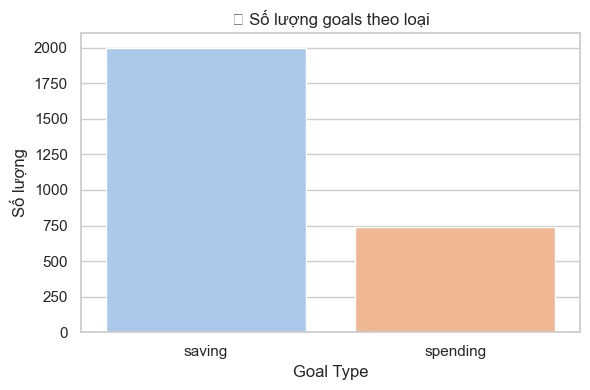

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12508\3569750050.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="goal_horizon", palette="muted")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_12508\3569750050.py:28: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\ASUS\Desktop\vpbank_hackathon\vpbank_venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


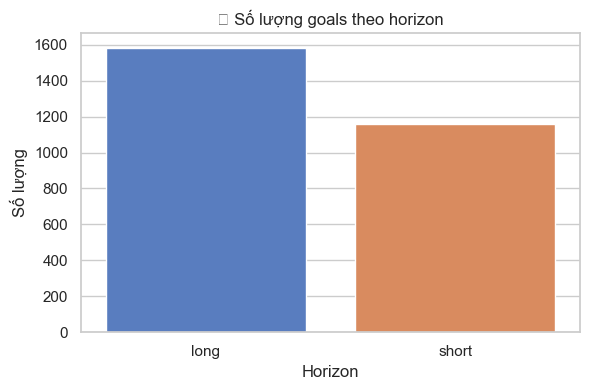

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12508\3569750050.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="associated_jar", order=df["associated_jar"].value_counts().index, palette="Set2")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_12508\3569750050.py:38: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\ASUS\Desktop\vpbank_hackathon\vpbank_venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


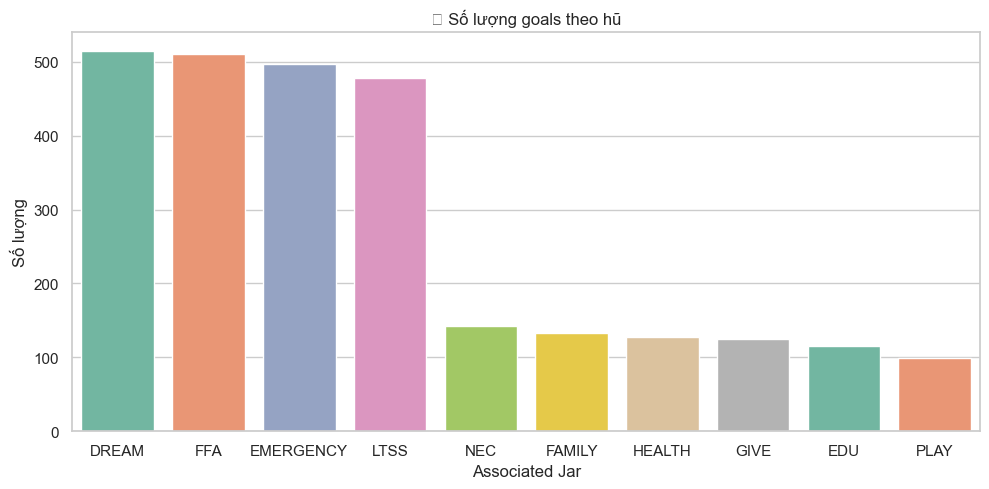

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12508\3569750050.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="goal_type", y="target_amount", palette="coolwarm")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_12508\3569750050.py:48: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\ASUS\Desktop\vpbank_hackathon\vpbank_venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


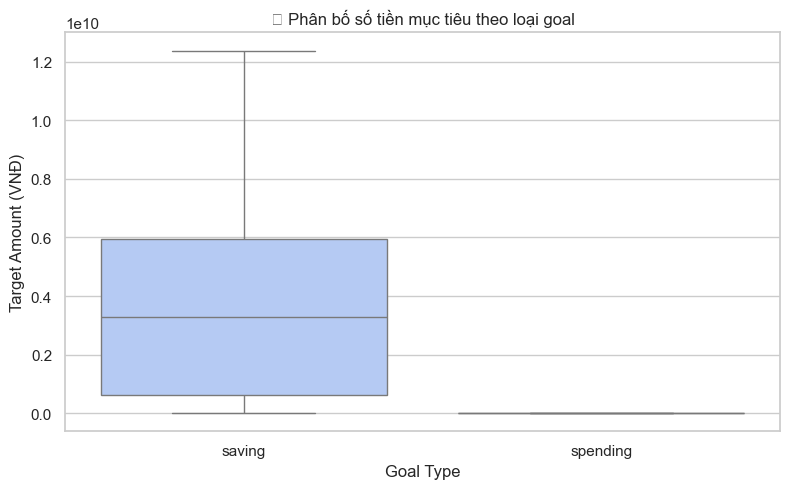

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ƒê·ªçc file CSV
df = pd.read_csv("user_goals_2saving_1spending.csv")

# Thi·∫øt l·∫≠p style ƒë·∫πp
sns.set(style="whitegrid")
plt.rcParams['font.size'] = 10

# ----- Bi·ªÉu ƒë·ªì 1: S·ªë l∆∞·ª£ng goal theo lo·∫°i (spending / saving) -----
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="goal_type", palette="pastel")
plt.title("üìå S·ªë l∆∞·ª£ng goals theo lo·∫°i")
plt.xlabel("Goal Type")
plt.ylabel("S·ªë l∆∞·ª£ng")
plt.tight_layout()
#plt.savefig("goals_by_type.png")
plt.show()

# ----- Bi·ªÉu ƒë·ªì 2: S·ªë l∆∞·ª£ng goal theo goal_horizon -----
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="goal_horizon", palette="muted")
plt.title("üìå S·ªë l∆∞·ª£ng goals theo horizon")
plt.xlabel("Horizon")
plt.ylabel("S·ªë l∆∞·ª£ng")
plt.tight_layout()
#plt.savefig("goals_by_horizon.png")
plt.show()

# ----- Bi·ªÉu ƒë·ªì 3: S·ªë l∆∞·ª£ng goals theo h≈© (associated_jar) -----
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="associated_jar", order=df["associated_jar"].value_counts().index, palette="Set2")
plt.title("üìå S·ªë l∆∞·ª£ng goals theo h≈©")
plt.xlabel("Associated Jar")
plt.ylabel("S·ªë l∆∞·ª£ng")
plt.tight_layout()
#plt.savefig("goals_by_jar.png")
plt.show()

# ----- Bi·ªÉu ƒë·ªì 4: Ph√¢n b·ªë target_amount theo lo·∫°i goal -----
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="goal_type", y="target_amount", palette="coolwarm")
plt.title("üìå Ph√¢n b·ªë s·ªë ti·ªÅn m·ª•c ti√™u theo lo·∫°i goal")
plt.xlabel("Goal Type")
plt.ylabel("Target Amount (VNƒê)")
plt.tight_layout()
#plt.savefig("target_amount_distribution.png")
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_12508\312468678.py:23: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\ASUS\Desktop\vpbank_hackathon\vpbank_venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


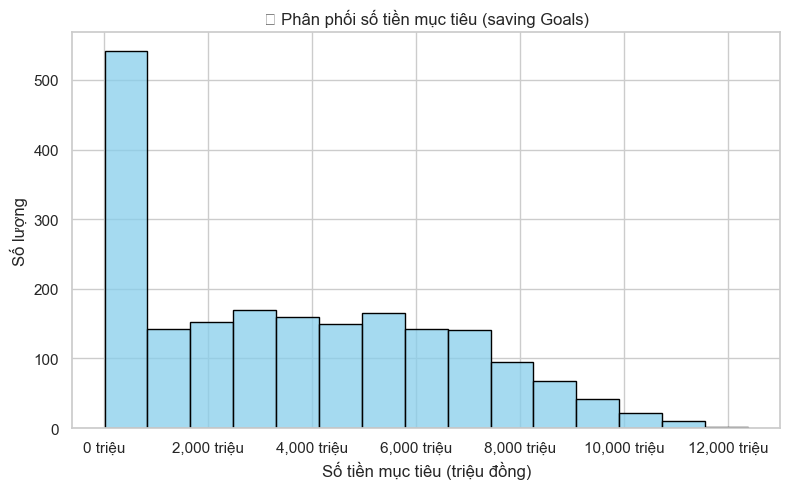

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# ƒê·ªçc file CSV
df = pd.read_csv("user_goals_2saving_1spending.csv")

# L·ªçc spending
spending_df = df[df["goal_type"] == "saving"].copy()

# Chuy·ªÉn sang ƒë∆°n v·ªã tri·ªáu ƒë·ªìng
spending_df["target_million"] = spending_df["target_amount"] / 1_000_000

# V·∫Ω bi·ªÉu ƒë·ªì histogram
plt.figure(figsize=(8, 5))
sns.histplot(spending_df["target_million"], bins=15, color="skyblue", edgecolor="black")

plt.title("üìä Ph√¢n ph·ªëi s·ªë ti·ªÅn m·ª•c ti√™u (saving Goals)")
plt.xlabel("S·ªë ti·ªÅn m·ª•c ti√™u (tri·ªáu ƒë·ªìng)")
plt.ylabel("S·ªë l∆∞·ª£ng")
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f} tri·ªáu'))
plt.tight_layout()
#plt.savefig("spending_target_hist_million.png")
plt.show()
